In [1]:
import pandas as pd
import nilearn
from nilearn import image
import numpy as np
%matplotlib inline
from nilearn.image import new_img_like
from nilearn import plotting
from nilearn import input_data
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
import random
from nilearn import image
from nilearn.plotting import plot_stat_map, show

In [2]:
##
nb_patient=37
for i in range(36,nb_patient+1):
    num_patient='p'+str(i)
    path_patient='/Users/Paul/Documents/articles/Perso/FET_dyn_IDH/dynamique/'
    images_p=nilearn.image.load_img(path_patient+num_patient+'/preprocessing/rr*.nii')
    mask_p=nilearn.image.load_img(path_patient+num_patient+'/preprocessing/mask_dil_*.nii')
    #images_p.to_filename(path_patient+'FINAL/DATA/'+num_patient+'.nii.gz')
    #mask_p.to_filename(path_patient+'FINAL/MASK/mask_dil_'+num_patient+'.nii')
    #dataset.append(path_patient+'DATA/'+num_patient+'.nii.gz')
   #mask_dataset.append(path_patient+'MASK/mask_dil_'+num_patient+'.nii')

In [3]:
import random

def k_means_clust(data,num_clust,num_iter):
    centroids=random.sample(list(data),num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        print(counter)
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]

        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]

    return centroids,assignments

def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return (DTW[len(s1)-1, len(s2)-1])**0.5

def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return (LB_sum)**0.5

In [3]:
######### Charge les données
dataset=[]
mask_dataset=[]
mask_neurom='/Users/Paul/Documents/articles/Perso/FET/patients/SPM/Neuromorphometrics_mask.nii'
n_patient=37
for i in range(1,n_patient+1):
    num_patient='p'+str(i)
    path_patient='/Users/Paul/Documents/articles/Perso/FET_dyn_IDH/dynamique/FINAL/'
    dataset.append(path_patient+'DATA/'+num_patient+'.nii.gz')
    mask_dataset.append(path_patient+'MASK/mask_dil_'+num_patient+'.nii')


In [25]:
for i in range(10,len(dataset)):
    print(i)
    img=nilearn.image.load_img(dataset[i])
    mean_image_i=nilearn.image.mean_img(img)
    mean_image_i.to_filename('mean_image_p'+str(i+1)+'.nii')

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


(91, 109, 91)

In [5]:

#######nb de voxel par mask
mask=nilearn.image.load_img(mask_dataset)
nb_voxel_mask=[]
for i in range(0,np.size(mask_dataset)):
    maski=image.index_img(mask, i)
    nb_voxel_mask.append(np.sum(maski.get_data()>0))

In [6]:
np.sum(nb_voxel_mask)

222425

In [7]:
l_patient=np.arange(1,len(dataset)+1)
l_patient_long=np.repeat(l_patient,nb_voxel_mask)
target_patient=set(l_patient)

In [8]:
 #####################A REFAIRE POUR CHAQUE PATIENT #####
########### ATTENTION au dataset[0 !!] ordre dans la liste diff du num

 #         A CHANGER : les num des masker et les mask / dataset
### patient 1
masker1 = NiftiMasker(mask_img=image.index_img(mask, 0),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked1 = masker1.fit_transform(dataset[0])
### patient 2
masker2 = NiftiMasker(mask_img=image.index_img(mask, 1),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked2 = masker2.fit_transform(dataset[1])
### patient 3
masker3= NiftiMasker(mask_img=image.index_img(mask, 2),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked3 = masker3.fit_transform(dataset[2])
### patient 4
masker4 = NiftiMasker(mask_img=image.index_img(mask, 3),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked4 = masker4.fit_transform(dataset[3])
### patient 5
masker5 = NiftiMasker(mask_img=image.index_img(mask, 4),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked5 = masker5.fit_transform(dataset[4])

### patient 6
masker6 = NiftiMasker(mask_img=image.index_img(mask, 5),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked6 = masker6.fit_transform(dataset[5])

### patient 7
masker7 = NiftiMasker(mask_img=image.index_img(mask, 6),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked7 = masker7.fit_transform(dataset[6])
### patient 8
masker8 = NiftiMasker(mask_img=image.index_img(mask, 7),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked8 = masker8.fit_transform(dataset[7])

### patient 9
masker9 = NiftiMasker(mask_img=image.index_img(mask, 8),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked9 = masker9.fit_transform(dataset[8])
### patient 10
masker10 = NiftiMasker(mask_img=image.index_img(mask, 9),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked10 = masker10.fit_transform(dataset[9])
### patient 11
masker11 = NiftiMasker(mask_img=image.index_img(mask, 10),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked11 = masker11.fit_transform(dataset[10])
### patient 12
masker12 = NiftiMasker(mask_img=image.index_img(mask, 11),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked12 = masker12.fit_transform(dataset[11])
### patient 13
masker13 = NiftiMasker(mask_img=image.index_img(mask, 12),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked13 = masker13.fit_transform(dataset[12])
### patient 14
masker14 = NiftiMasker(mask_img=image.index_img(mask, 13),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked14 = masker14.fit_transform(dataset[13])
### patient 15
masker15 = NiftiMasker(mask_img=image.index_img(mask, 14),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked15 = masker15.fit_transform(dataset[14])

### patient 16
masker16 = NiftiMasker(mask_img=image.index_img(mask, 15),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked16 = masker16.fit_transform(dataset[15])
### patient 17
masker17 = NiftiMasker(mask_img=image.index_img(mask, 16),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked17 = masker17.fit_transform(dataset[16])
### patient 18
masker18 = NiftiMasker(mask_img=image.index_img(mask, 17),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked18 = masker18.fit_transform(dataset[17])

### patient 19
masker19 = NiftiMasker(mask_img=image.index_img(mask, 18),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked19 = masker19.fit_transform(dataset[18])
### patient 20
masker20 = NiftiMasker(mask_img=image.index_img(mask, 19),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked20 = masker20.fit_transform(dataset[19])
### patient 21
masker21 = NiftiMasker(mask_img=image.index_img(mask, 20),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked21 = masker21.fit_transform(dataset[20])
### patient 22
masker22 = NiftiMasker(mask_img=image.index_img(mask, 21),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked22 = masker22.fit_transform(dataset[21])
### patient 23
masker23 = NiftiMasker(mask_img=image.index_img(mask, 22),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked23 = masker23.fit_transform(dataset[22])
### patient 24
masker24 = NiftiMasker(mask_img=image.index_img(mask, 23),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked24 = masker24.fit_transform(dataset[23])
### patient 25
masker25 = NiftiMasker(mask_img=image.index_img(mask, 24),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked25 = masker25.fit_transform(dataset[24])
### patient 26
masker26 = NiftiMasker(mask_img=image.index_img(mask, 25),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked26 = masker26.fit_transform(dataset[25])

### patient 27
masker27 = NiftiMasker(mask_img=image.index_img(mask, 26),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked27 = masker27.fit_transform(dataset[26])

### patient 28
masker28 = NiftiMasker(mask_img=image.index_img(mask, 27),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked28 = masker28.fit_transform(dataset[27])

### patient 29
masker29= NiftiMasker(mask_img=image.index_img(mask, 28),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked29 = masker29.fit_transform(dataset[28])

### patient 30
masker30 = NiftiMasker(mask_img=image.index_img(mask, 29),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked30 = masker30.fit_transform(dataset[29])

### patient 31
masker31 = NiftiMasker(mask_img=image.index_img(mask, 30),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked31 = masker31.fit_transform(dataset[30])

### patient 32
masker32 = NiftiMasker(mask_img=image.index_img(mask, 31),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked32 = masker32.fit_transform(dataset[31])

### patient 33
masker33 = NiftiMasker(mask_img=image.index_img(mask, 32),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked33 = masker33.fit_transform(dataset[32])

### patient 34
masker34 = NiftiMasker(mask_img=image.index_img(mask, 33),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked34 = masker34.fit_transform(dataset[33])

### patient 35
masker35 = NiftiMasker(mask_img=image.index_img(mask, 34),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked35 = masker35.fit_transform(dataset[34])

### patient 36
masker36 = NiftiMasker(mask_img=image.index_img(mask, 35),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked36 = masker36.fit_transform(dataset[35])


### patient 37
masker37 = NiftiMasker(mask_img=image.index_img(mask, 36),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked37 = masker37.fit_transform(dataset[36])


In [9]:
##################### MASKER NON NORMALISE #####
########### ATTENTION au dataset[0 !!] ordre dans la liste diff du num

 #         A CHANGER : les num des masker et les mask / dataset
### patient 1
masker1_nn=NiftiMasker(mask_img=image.index_img(mask, 0),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked1_nn=masker1_nn.fit_transform(dataset[0])
### patient 2
masker2_nn=NiftiMasker(mask_img=image.index_img(mask, 1),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked2_nn=masker2_nn.fit_transform(dataset[1])
### patient 3
masker3_nn= NiftiMasker(mask_img=image.index_img(mask, 2),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked3_nn=masker3_nn.fit_transform(dataset[2])
### patient 4
masker4_nn=NiftiMasker(mask_img=image.index_img(mask, 3),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked4_nn=masker4_nn.fit_transform(dataset[3])
### patient 5
masker5_nn=NiftiMasker(mask_img=image.index_img(mask, 4),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked5_nn=masker5_nn.fit_transform(dataset[4])

### patient 6
masker6_nn=NiftiMasker(mask_img=image.index_img(mask, 5),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked6_nn=masker6_nn.fit_transform(dataset[5])

### patient 7
masker7_nn=NiftiMasker(mask_img=image.index_img(mask, 6),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked7_nn=masker7_nn.fit_transform(dataset[6])
### patient 8
masker8_nn=NiftiMasker(mask_img=image.index_img(mask, 7),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked8_nn=masker8_nn.fit_transform(dataset[7])

### patient 9
masker9_nn=NiftiMasker(mask_img=image.index_img(mask, 8),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked9_nn=masker9_nn.fit_transform(dataset[8])
### patient 10
masker10_nn=NiftiMasker(mask_img=image.index_img(mask, 9),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked10_nn=masker10_nn.fit_transform(dataset[9])
### patient 11
masker11_nn=NiftiMasker(mask_img=image.index_img(mask, 10),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked11_nn=masker11_nn.fit_transform(dataset[10])
### patient 12
masker12_nn=NiftiMasker(mask_img=image.index_img(mask, 11),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked12_nn=masker12_nn.fit_transform(dataset[11])
### patient 13
masker13_nn=NiftiMasker(mask_img=image.index_img(mask, 12),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked13_nn=masker13_nn.fit_transform(dataset[12])
### patient 14
masker14_nn=NiftiMasker(mask_img=image.index_img(mask, 13),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked14_nn=masker14_nn.fit_transform(dataset[13])
### patient 15
masker15_nn=NiftiMasker(mask_img=image.index_img(mask, 14),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked15_nn=masker15_nn.fit_transform(dataset[14])

### patient 16
masker16_nn=NiftiMasker(mask_img=image.index_img(mask, 15),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked16_nn=masker16_nn.fit_transform(dataset[15])
### patient 17
masker17_nn=NiftiMasker(mask_img=image.index_img(mask, 16),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked17_nn=masker17_nn.fit_transform(dataset[16])
### patient 18
masker18_nn=NiftiMasker(mask_img=image.index_img(mask, 17),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked18_nn=masker18_nn.fit_transform(dataset[17])

### patient 19
masker19_nn=NiftiMasker(mask_img=image.index_img(mask, 18),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked19_nn=masker19_nn.fit_transform(dataset[18])
### patient 20
masker20_nn=NiftiMasker(mask_img=image.index_img(mask, 19),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked20_nn=masker20_nn.fit_transform(dataset[19])
### patient 21
masker21_nn=NiftiMasker(mask_img=image.index_img(mask, 20),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked21_nn=masker21_nn.fit_transform(dataset[20])
### patient 22
masker22_nn=NiftiMasker(mask_img=image.index_img(mask, 21),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked22_nn=masker22_nn.fit_transform(dataset[21])
### patient 23
masker23_nn=NiftiMasker(mask_img=image.index_img(mask, 22),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked23_nn=masker23_nn.fit_transform(dataset[22])
### patient 24
masker24_nn=NiftiMasker(mask_img=image.index_img(mask, 23),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked24_nn=masker24_nn.fit_transform(dataset[23])
### patient 25
masker25_nn=NiftiMasker(mask_img=image.index_img(mask, 24),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked25_nn=masker25_nn.fit_transform(dataset[24])
### patient 26
masker26_nn=NiftiMasker(mask_img=image.index_img(mask, 25),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked26_nn=masker26_nn.fit_transform(dataset[25])

### patient 27
masker27_nn=NiftiMasker(mask_img=image.index_img(mask, 26),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked27_nn=masker27_nn.fit_transform(dataset[26])

### patient 28
masker28_nn=NiftiMasker(mask_img=image.index_img(mask, 27),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked28_nn=masker28_nn.fit_transform(dataset[27])
### patient 29
masker29_nn= NiftiMasker(mask_img=image.index_img(mask, 28),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked29_nn=masker29_nn.fit_transform(dataset[28])

### patient 30
masker30_nn=NiftiMasker(mask_img=image.index_img(mask, 29),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked30_nn=masker30_nn.fit_transform(dataset[29])

### patient 31
masker31_nn=NiftiMasker(mask_img=image.index_img(mask, 30),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked31_nn=masker31_nn.fit_transform(dataset[30])

### patient 32
masker32_nn=NiftiMasker(mask_img=image.index_img(mask, 31),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked32_nn=masker32_nn.fit_transform(dataset[31])

### patient 33
masker33_nn=NiftiMasker(mask_img=image.index_img(mask, 32),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked33_nn=masker33_nn.fit_transform(dataset[32])

### patient 34
masker34_nn=NiftiMasker(mask_img=image.index_img(mask, 33),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked34_nn=masker34_nn.fit_transform(dataset[33])

### patient 35
masker35_nn=NiftiMasker(mask_img=image.index_img(mask, 34),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked35_nn=masker35_nn.fit_transform(dataset[34])

### patient 36
masker36_nn=NiftiMasker(mask_img=image.index_img(mask, 35),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked36_nn=masker36_nn.fit_transform(dataset[35])

### patient 37
masker37_nn=NiftiMasker(mask_img=image.index_img(mask, 36),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=False)
data_masked37_nn=masker37_nn.fit_transform(dataset[36])


In [10]:
#####SI TOUS LES PATIENTS
############## ajouter les uns à la suite des autres+++
X=np.concatenate((data_masked1,data_masked2,data_masked3,data_masked4,
                 data_masked5,data_masked6,data_masked7,data_masked8,data_masked9,data_masked10,data_masked11,data_masked12,
                 data_masked13,data_masked14,data_masked15,data_masked16,data_masked17,data_masked18,data_masked19,
                 data_masked20,data_masked21,data_masked22,data_masked23,data_masked24,data_masked25,data_masked26,data_masked27,
                 data_masked28,data_masked29,data_masked30,data_masked31,data_masked32,data_masked33,data_masked34,
                 data_masked35,data_masked36,data_masked37),axis=1)

if (X.shape[1]-np.sum(nb_voxel_mask))!=0 : 
    print("ATTENTION ERREUR MASKER")

In [11]:
#####SI TOUS LES PATIENTS NON NORMALISES
############## ajouter les uns à la suite des autres+++
X_nn=np.concatenate((data_masked1_nn,data_masked2_nn,data_masked3_nn,data_masked4_nn,
                 data_masked5_nn,data_masked6_nn,data_masked7_nn,data_masked8_nn,data_masked9_nn,data_masked10_nn,data_masked11_nn,data_masked12_nn,
                 data_masked13_nn,data_masked14_nn,data_masked15_nn,data_masked16_nn,data_masked17_nn,data_masked18_nn,data_masked19_nn,
                 data_masked20_nn,data_masked21_nn,data_masked22_nn,data_masked23_nn,data_masked24_nn,data_masked25_nn,data_masked26_nn,data_masked27_nn,
                 data_masked28_nn,data_masked29_nn,data_masked30_nn,data_masked31_nn,data_masked32_nn,data_masked33_nn,data_masked34_nn,
                 data_masked35_nn,data_masked36_nn,data_masked37_nn),axis=1)

if (X_nn.shape[1]-np.sum(nb_voxel_mask))!=0 : 
    print("ATTENTION ERREUR MASKER")

In [12]:
vox_ts=X.T
vox_ts_nn=X_nn.T


In [15]:
vox_ts.dtype

dtype('float64')

In [15]:
import random
random.seed(0)
centroids3_10,assignments3_10=k_means_clust(vox_ts,3,8)

1
2
3
4
5
6
7
8


In [14]:
### centroids,assignments=centroids3_10,assignments3_10
#centroids,assignments=centroids2_8,assignments2_8


In [15]:
centroids,assignments=centroids3_10,assignments3_10
#centroids,assignments=centroids2_8,assignments2_8


In [16]:
#a=(0.49803921568627452, 0.78823529411764703, 0.49803921568627452)

In [17]:
###label
labels=np.array(list((assignments.keys())))+1
labels_name=['Courbe 1','Courbe 2','Courbe3']
#labels=[(1,2,3)]
###Colors
colors = [(0.49803921568627452, 0.78823529411764703, 0.49803921568627452),(0.2196078431372549,  0.42352941176470588, 0.69019607843137254), (0.4, 0.4, 0.4 ),'#d62728']



In [18]:
#colors = [ (0.74509803921568629, 0.68235294117647061, 0.83137254901960789),(0.4, 0.4, 0.4 ),(0.49803921568627452, 0.78823529411764703, 0.49803921568627452)]


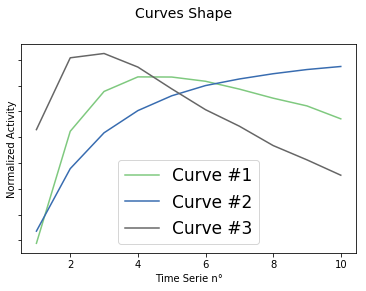

In [19]:
fig = plt.figure()
fig.suptitle('Curves Shape', fontsize=14)
ax = fig.add_subplot(111)
plt.setp( ax.get_yticklabels(), visible=False)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Time Serie n°')
ax.set_ylabel('Normalized Activity')
ax.grid(False)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

for i,label,color in zip(centroids,assignments,colors):

    ax.plot(np.arange(1,11),i,color=color)
    plt.legend(('Curve #1','Curve #2','Curve #3'),prop={'size':17})

plt.show()
fig.savefig('Curves Intensity Shape.png')

In [20]:
### FIT EACH VOXEL WITH CURVE SHAPE
min_MSE=np.repeat(np.nan,vox_ts.shape[0])
for iter_test in range(0,(vox_ts.shape[0])):
    min_dist=np.argmin(np.sum((vox_ts[iter_test]-centroids)**2,axis=1))
    min_MSE[iter_test]=min_dist


NameError: name 'ArrayDicom' is not defined

In [21]:
###NE PAS FAIRE
#min_MSE[min_MSE==0]=2
#min_MSE[min_MSE==1]=0
#min_MSE[min_MSE==2]=1


1
1.0


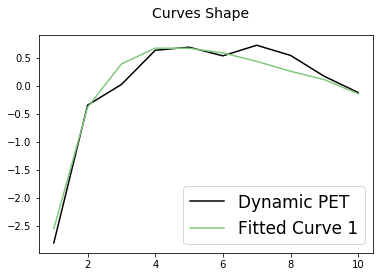

In [22]:
fig = plt.figure()
fig.suptitle('Curves Shape', fontsize=14)

# VOXEL COURBE 1
iter_test=1029
min_dist=np.argmin(np.sum((vox_ts[iter_test]-centroids)**2,axis=1))
print(min_dist+1)
print(min_MSE[iter_test]+1)
ax2 = fig.add_subplot(111)

plt.setp( ax2.get_yticklabels(), visible=True)

ax2.grid(False)
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
plt.plot(np.arange(1,11),vox_ts[iter_test],color='black')
plt.plot(np.arange(1,11),centroids[min_dist],color=colors[min_dist])
plt.legend(['Dynamic PET','Fitted Curve 1'],prop={'size':17})
plt.savefig('Curve1_Fitted.png')

2
2.0


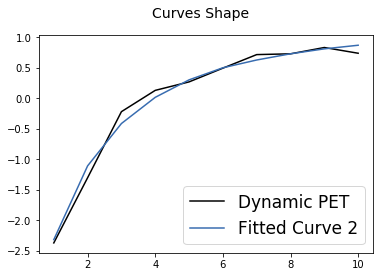

In [23]:
fig = plt.figure()
fig.suptitle('Curves Shape', fontsize=14)
plt.setp( ax.get_yticklabels(), visible=True)

# VOXEL COURBE 2
iter_test=16000
min_dist=np.argmin(np.sum((vox_ts[iter_test]-centroids)**2,axis=1))

ax2 = fig.add_subplot(111)


ax2.grid(False)
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')

print(min_dist+1)
print(min_MSE[iter_test]+1)
plt.plot(np.arange(1,11),vox_ts[iter_test],color='black')
plt.plot(np.arange(1,11),centroids[min_dist],color=colors[min_dist])
plt.legend(['Dynamic PET','Fitted Curve '+str(int(min_MSE[iter_test]+1))],prop={'size':17},loc='lower right')
plt.savefig('Curve2_Fitted.png')

3
3.0


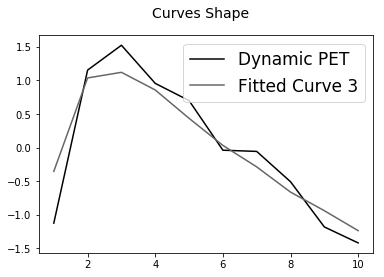

In [24]:
fig = plt.figure()
fig.suptitle('Curves Shape', fontsize=14)
plt.setp( ax.get_yticklabels(), visible=True)

# VOXEL COURBE 3
iter_test=18100
min_dist=np.argmin(np.sum((vox_ts[iter_test]-centroids)**2,axis=1))

ax2 = fig.add_subplot(111)


ax2.grid(False)
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')

print(min_dist+1)
print(min_MSE[iter_test]+1)
plt.plot(np.arange(1,11),vox_ts[iter_test],color='black')
plt.plot(np.arange(1,11),centroids[min_dist],color=colors[min_dist])
plt.legend(['Dynamic PET','Fitted Curve 3'],prop={'size':17},loc='upper right')
plt.savefig('Curve3_Fitted.png')

/Users/Paul/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


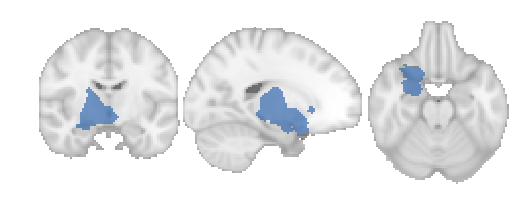

In [25]:
idx=8
vox_i=l_patient_long==idx
p_idx_cv=min_MSE[vox_i]+1
p_idx_cv_img = masker8.inverse_transform(p_idx_cv)
fig=plotting.plot_roi(p_idx_cv_img,cmap='Accent',annotate=False,draw_cross=False,cut_coords=(-18,-10,-22))
fig.savefig('p8IDHpos.png')
p_idx_cv_img.to_filename('../dynamique/p'+str(idx)+'/results/p_'+str(idx)+'_cluster.nii')
p_idx_cv_img.to_filename('../dynamique/p'+str(idx)+'/results/p_'+str(idx)+'_cluster.nii')


/Users/Paul/miniconda2/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/Users/Paul/miniconda2/envs/python3/lib/python3.5/site-packages/nilearn/plotting/img_plotting.py:141: UserWarning: NaN is not permitted for the vmax and vmin arguments.
Tip: Use np.nan_max() instead of np.max().
  warnings.warn(nan_msg)
/Users/Paul/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


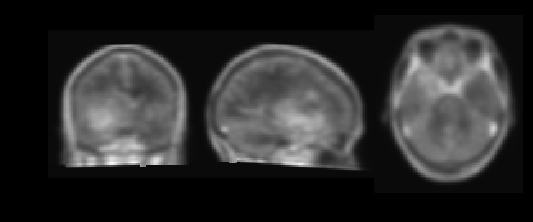

In [26]:
mean_img=nilearn.image.load_img('../dynamique/p'+str(idx)+'/preprocessing/mean_image_p'+str(idx)+'.nii')
fig=plotting.plot_anat(mean_img, display_mode='ortho',cut_coords=(-18,-10,-22),annotate=False,draw_cross=False)
fig.savefig('p8.png')


In [27]:
ls_patient_cat=[]
for iter_patient in np.unique(l_patient):
    vox_i=l_patient_long==iter_patient
    p_iter=min_MSE[vox_i]
    nb_cat_p_i=np.repeat(np.nan,len(np.unique(min_MSE)))
    for cat_num in list(np.unique(min_MSE)):
        nb_cat_p_i[cat_num]=(np.sum(p_iter==cat_num))
    ls_patient_cat.append(nb_cat_p_i)
ls_patient_cat=np.array(ls_patient_cat)

/Users/Paul/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [28]:
#### Recup Pour chaque patient la courbe : comme si ROI sur toute la tumeur
TAC_p_all=[]
for iter_patient in np.unique(l_patient):
    vox_i=l_patient_long==iter_patient
    TAC_p_all.append(np.sum(vox_ts_nn[vox_i],axis=0))
TAC_p_all=np.array(TAC_p_all)
from sklearn import preprocessing
scale_TAC_p_all=preprocessing.scale(TAC_p_all,axis=1)


min_MSE_TAC_all=np.repeat(np.nan,scale_TAC_p_all.shape[0])
for iter_test in range(0,(scale_TAC_p_all.shape[0])):
    min_dist=np.argmin(np.sum((scale_TAC_p_all[iter_test]-centroids)**2,axis=1))
    min_MSE_TAC_all[iter_test]=min_dist+1


/Users/Paul/miniconda2/envs/python3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


1
1.0


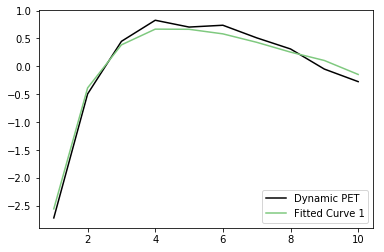

In [29]:
# VOXEL COURBE 1
iter_test=0
min_dist=np.argmin(np.sum((scale_TAC_p_all[iter_test]-centroids)**2,axis=1))
print(min_dist+1)
print(min_MSE_TAC_all[iter_test])
plt.plot(np.arange(1,11),scale_TAC_p_all[iter_test],color='black')
plt.plot(np.arange(1,11),centroids[min_dist],color=colors[min_dist])
plt.legend(['Dynamic PET','Fitted Curve 1'])


In [30]:
##
subcat=pd.DataFrame(ls_patient_cat)
subcat.columns=['courbe1','courbe2','courbe3']
subcat.fillna(0)
subcat['volume']=subcat.courbe1+subcat.courbe2+subcat.courbe3
subcat['prop1']=subcat.courbe1/subcat.volume
subcat['prop2']=subcat.courbe2/subcat.volume
subcat['prop3']=subcat.courbe3/subcat.volume

In [31]:
import openpyxl
import seaborn as sb
from openpyxl import load_workbook
wb = load_workbook(filename='/Users/Paul/Documents/articles/Perso/FET_dyn_IDH/Status_survival.xlsx')
ws=wb.active
df = pd.DataFrame(ws.values)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df=pd.DataFrame(df,dtype=float)

output=df.rename(columns = new_header)
output.index=range(0,37)


all_dat=pd.concat([output,subcat],axis=1)


/Users/Paul/miniconda2/envs/python3/lib/python3.5/site-packages/openpyxl/reader/worksheet.py:307: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [32]:
### Defini tous les activites / SUV initiaux / finaux totaux

###  FINAL
activite_sum_all=np.sum(vox_ts_nn[:,7:10],axis=1)
ls_activite_mean=[]
for iter_patient in np.unique(l_patient):
    vox_i=l_patient_long==iter_patient
    p_iter=activite_sum_all[vox_i]
    ls_activite_mean.append(np.mean(p_iter))
ls_activite_mean=np.array(ls_activite_mean)
all_dat['mean_7_10_activity']=ls_activite_mean

activite_sum_all=np.sum(vox_ts_nn[:,7:10],axis=1)
ls_activite_mean=[]
for iter_patient in np.unique(l_patient):
    vox_i=l_patient_long==iter_patient
    p_iter=activite_sum_all[vox_i]
    ls_activite_mean.append(np.max(p_iter))
ls_activite_mean=np.array(ls_activite_mean)
all_dat['max_7_10_activity']=ls_activite_mean

## ALL 
activite_sum_all=np.sum(vox_ts_nn[:,0:10],axis=1)
ls_activite_mean=[]
for iter_patient in np.unique(l_patient):
    vox_i=l_patient_long==iter_patient
    p_iter=activite_sum_all[vox_i]
    ls_activite_mean.append(np.mean(p_iter))
ls_activite_mean=np.array(ls_activite_mean)
all_dat['mean_all_activity']=ls_activite_mean

activite_sum_all=np.sum(vox_ts_nn[:,0:10],axis=1)
ls_activite_mean=[]
for iter_patient in np.unique(l_patient):
    vox_i=l_patient_long==iter_patient
    p_iter=activite_sum_all[vox_i]
    ls_activite_mean.append(np.max(p_iter))
ls_activite_mean=np.array(ls_activite_mean)
all_dat['max_all_activity']=ls_activite_mean

## Initial 
activite_sum_all=np.sum(vox_ts_nn[:,0:3],axis=1)
ls_activite_mean=[]
for iter_patient in np.unique(l_patient):
    vox_i=l_patient_long==iter_patient
    p_iter=activite_sum_all[vox_i]
    ls_activite_mean.append(np.mean(p_iter))
ls_activite_mean=np.array(ls_activite_mean)
all_dat['mean_0_3_activity']=ls_activite_mean

activite_sum_all=np.sum(vox_ts_nn[:,0:3],axis=1)
ls_activite_mean=[]
for iter_patient in np.unique(l_patient):
    vox_i=l_patient_long==iter_patient
    p_iter=activite_sum_all[vox_i]
    ls_activite_mean.append(np.max(p_iter))
ls_activite_mean=np.array(ls_activite_mean)
all_dat['max_0_3_activity']=ls_activite_mean

all_dat['SUVmean_all']=all_dat['mean_all_activity']/all_dat['activity']/all_dat['body_weight']
all_dat['SUVmax_all']=all_dat['max_all_activity']/all_dat['activity']/all_dat['body_weight']
all_dat['SUVmean_0_3']=all_dat['mean_0_3_activity']/all_dat['activity']/all_dat['body_weight']
all_dat['SUVmax_0_3']=all_dat['max_0_3_activity']/all_dat['activity']/all_dat['body_weight']
all_dat['SUVmean_7_10']=all_dat['mean_7_10_activity']/all_dat['activity']/all_dat['body_weight']
all_dat['SUVmax_7_10']=all_dat['max_7_10_activity']/all_dat['activity']/all_dat['body_weight']

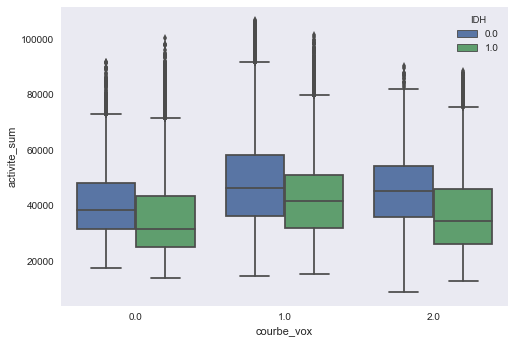

In [33]:
## a l'echelle du voxel : IDH et activite ?
IDH_long=np.array(np.repeat(all_dat.IDH,nb_voxel_mask)[:])
IDH_mean=pd.DataFrame(IDH_long,columns=['IDH'])
IDH_mean['activite_sum']=np.array(np.sum(vox_ts_nn[:,0:10],axis=1))
IDH_mean['courbe_vox']=min_MSE
IDH_mean['patient']=l_patient_long
ax=sb.boxplot(y=IDH_mean.activite_sum,x='courbe_vox',hue='IDH',data=IDH_mean,)
ax.get_figure().savefig('activity_IDH_curve.png')
ax.grid(False)

In [63]:
df_vox_ts_nn=pd.DataFrame(vox_ts_nn)
df_vox_ts_nn['patient']=l_patient_long
whole_tumor_TAC_patient=df_vox_ts_nn.groupby('patient').sum()
whole_tumor_TAC_patient=np.array(whole_tumor_TAC_patient)

In [65]:
whole_tumor_TAC_patient[0]

array([ 5617087.11032934,  7681295.7077142 ,  8557013.79656202,
        8908194.26383018,  8794586.2328743 ,  8824904.34778671,
        8615105.84455971,  8429979.42651351,  8095144.04046503,
        7886232.29568886])

In [66]:
### FIT EACH PATIENT WITH CURVE SHAPE
cat_TAC_whole_tumor=np.repeat(np.nan,whole_tumor_TAC_patient.shape[0])
for iter_test in range(0,(whole_tumor_TAC_patient.shape[0])):
    min_dist=np.argmin(np.sum((whole_tumor_TAC_patient[iter_test]-centroids)**2,axis=1))
    cat_TAC_whole_tumor[iter_test]=min_dist


array([ 0.,  2.,  2.,  1.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  2.,  0.,  2.,  2.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.])

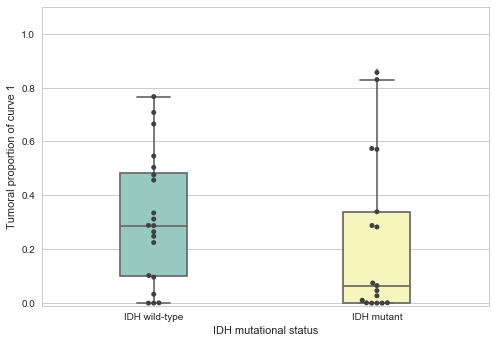

In [36]:
import seaborn as sb
sb.set_style("whitegrid")
ax = sb.boxplot(y='prop1',x='IDH',data=all_dat, palette="Set3",width=0.3)
ax = sb.swarmplot(y='prop1',x='IDH',data=all_dat, color='.25')

plt.xticks(plt.xticks()[0], ('IDH wild-type','IDH mutant'))
ax.set(ylim=(-0.01,1.1))
ax.set(ylabel='Tumoral proportion of curve 1')

ax.set(xlabel='IDH mutational status')
ax.get_figure().savefig('prop1.png')
#0.132704266586


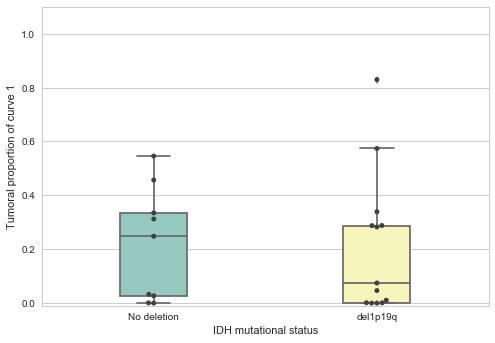

In [37]:
sb.set_style("whitegrid")
ax = sb.boxplot(y='prop1',x='del1p19q',data=all_dat, palette="Set3",width=0.3)
ax = sb.swarmplot(y='prop1',x='del1p19q',data=all_dat, color='.25')

plt.xticks(plt.xticks()[0], ('No deletion','del1p19q'))
ax.set(ylim=(-0.01,1.1))
ax.set(ylabel='Tumoral proportion of curve 1')

ax.set(xlabel='IDH mutational status')
ax.get_figure().savefig('prop1del1p.png')
#0.132704266586

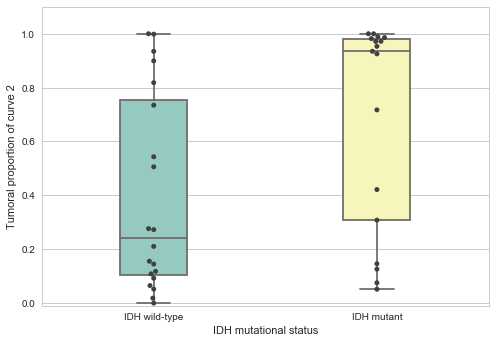

In [38]:
ax = sb.boxplot(y='prop2',x='IDH',data=all_dat, palette="Set3",width=0.3)
ax = sb.swarmplot(y='prop2',x='IDH',data=all_dat, color='.25')

plt.xticks(plt.xticks()[0], ('IDH wild-type','IDH mutant'))
ax.set(ylim=(-0.01,1.1))
ax.set(ylabel='Tumoral proportion of curve 2')

ax.set(xlabel='IDH mutational status')
ax.get_figure().savefig('prop2.png')
#pval=0.0159596013583


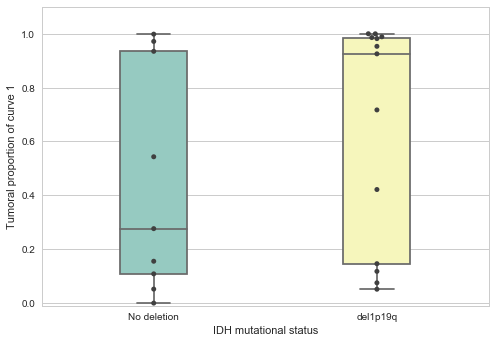

In [39]:
sb.set_style("whitegrid")
ax = sb.boxplot(y='prop2',x='del1p19q',data=all_dat, palette="Set3",width=0.3)
ax = sb.swarmplot(y='prop2',x='del1p19q',data=all_dat, color='.25')

plt.xticks(plt.xticks()[0], ('No deletion','del1p19q'))
ax.set(ylim=(-0.01,1.1))
ax.set(ylabel='Tumoral proportion of curve 1')

ax.set(xlabel='IDH mutational status')
ax.get_figure().savefig('prop2del1p.png')


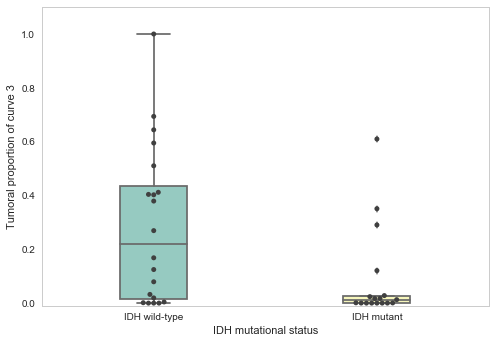

In [40]:
ax = sb.boxplot(y='prop3',x='IDH',data=all_dat, palette="Set3",width=0.3)
ax = sb.swarmplot(y='prop3',x='IDH',data=all_dat, color='.25')

plt.xticks(plt.xticks()[0], ('IDH wild-type','IDH mutant'))
ax.set(ylim=(-0.01,1.1))
ax.set(ylabel='Tumoral proportion of curve 3')

ax.set(xlabel='IDH mutational status')
ax.grid(False)
ax.get_figure().savefig('prop3.png')
#0.00889942619359

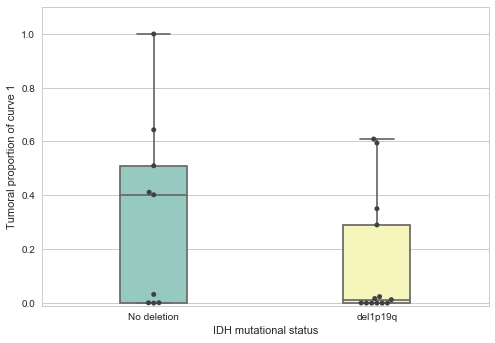

In [41]:
sb.set_style("whitegrid")
ax = sb.boxplot(y='prop3',x='del1p19q',data=all_dat, palette="Set3",width=0.3)
ax = sb.swarmplot(y='prop3',x='del1p19q',data=all_dat, color='.25')

plt.xticks(plt.xticks()[0], ('No deletion','del1p19q'))
ax.set(ylim=(-0.01,1.1))
ax.set(ylabel='Tumoral proportion of curve 1')

ax.set(xlabel='IDH mutational status')
ax.get_figure().savefig('prop3del1p.png')
#0.132704266586

In [42]:
IDH_mute=all_dat[all_dat.IDH==1]
IDH_non_mute=all_dat[all_dat.IDH==0]

In [43]:
IDH_mute

,IDH,del1p19q,PFS,machine,DureePFS,OS,DureeOS,activity,body_weight,grade,...,mean_all_activity,max_all_activity,mean_0_3_activity,max_0_3_activity,SUVmean_all,SUVmax_all,SUVmean_0_3,SUVmax_0_3,SUVmean_7_10,SUVmax_7_10
0,1.0,1.0,1.0,1.0,48.266667,0.0,56.900000,218.0,79.0,2.0,...,38292.353277,66423.190335,10280.054852,18901.710099,2.223456,3.856880,0.596914,1.097533,0.666722,1.080295
4,1.0,NaN,1.0,1.0,37.566667,0.0,37.566667,220.0,77.0,2.0,...,35882.622545,45965.247453,8488.071859,10988.459781,2.118219,2.713415,0.501067,0.648669,0.709741,0.928613
7,1.0,1.0,0.0,1.0,35.966667,0.0,35.966667,212.0,72.0,3.0,...,46419.725355,58576.957187,10390.375008,15902.399294,3.041125,3.837589,0.680711,1.041824,1.086553,1.405986
9,1.0,NaN,1.0,1.0,10.766667,1.0,24.633333,173.0,80.0,3.0,...,30161.230241,35605.271595,8269.479007,9583.114898,2.179280,2.572635,0.597506,0.692422,0.666921,0.795955
12,1.0,1.0,0.0,1.0,14.400000,0.0,14.400000,231.0,60.0,2.0,...,38648.792775,54459.324393,8783.081644,12209.418360,2.788513,3.929244,0.633700,0.880910,0.980148,1.403221
14,1.0,1.0,1.0,1.0,40.966667,0.0,40.966667,245.0,60.0,2.0,...,57859.243483,91420.786940,16611.406806,27342.705977,3.936003,6.219101,1.130028,1.860048,1.147693,1.968841
16,1.0,NaN,1.0,1.0,8.966667,1.0,8.966667,219.0,82.0,2.0,...,29135.770436,32597.274447,7961.314643,9219.402385,1.622440,1.815195,0.443330,0.513387,0.514354,0.568261
19,1.0,1.0,0.0,2.0,79.533333,0.0,82.566667,215.0,70.0,4.0,...,23675.612669,33805.047337,5419.590054,8803.416050,1.573130,2.246183,0.360106,0.584945,0.551993,0.744701
20,1.0,1.0,0.0,2.0,72.766667,0.0,76.700000,210.0,82.0,3.0,...,29653.710021,44741.751448,8958.461362,14751.434560,1.722051,2.598243,0.520236,0.856645,0.496650,0.712100
21,1.0,NaN,0.0,2.0,73.000000,0.0,73.000000,220.0,96.0,3.0,...,23335.702844,32949.656008,6286.574329,9350.642503,1.104910,1.560116,0.297660,0.442739,0.337985,0.497381


In [44]:
from scipy.stats import mannwhitneyu

u_value, p_value = mannwhitneyu(IDH_non_mute.SUVmean_all,IDH_mute.SUVmean_all)

#u_value, p_value = mannwhitneyu(IDH_non_mute.prop3+IDH_non_mute.prop1,IDH_mute.prop3+IDH_mute.prop1)
print(p_value)

0.0738624229153


In [45]:
print(np.median(IDH_non_mute.mean_0_3_activity))
print(np.median(IDH_mute.mean_0_3_activity))


11686.4415702
8829.95437076


In [46]:
import lifelines
T = all_dat['DureeOS']
E = all_dat['OS']


from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E) # more succiently, kmf.fit(T,E)


<lifelines.KaplanMeierFitter: fitted with 37 observations, 24 censored>

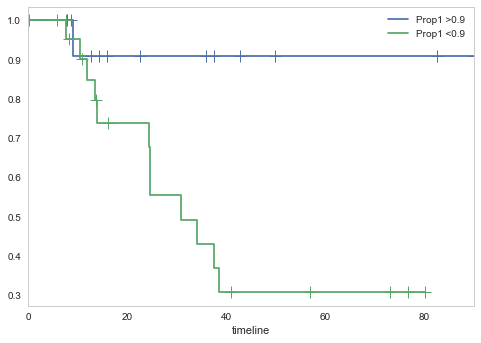

In [47]:
#### Prop1 
groups = all_dat['prop2']>0.9
#groups=groups==True
kmf.fit(T[groups ==True], E[groups ==True], label='Prop1 >0.9')
ax = kmf.plot(ci_show=False,show_censors=True)


kmf.fit(T[groups ==False], E[groups ==False], label='Prop1 <0.9')
kmf.plot(ax=ax,ci_show=False,show_censors=True)

from lifelines.plotting import add_at_risk_counts
#add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.grid(False)

#ax.figure.savefig('prop1_0.9_OS.png')

In [48]:
from lifelines.statistics import logrank_test

results = logrank_test(T[groups==1], T[groups==0], E[groups==1], E[groups==0], alpha=.95 )

results.print_summary()

Results
   alpha: 0.95
   df: 1
   test: logrank
   null distribution: chi squared
   t 0: -1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.02642 |              4.928 |      Reject Null    |        True       


In [82]:
####
all_dat['whole_tumor_TAC']=cat_TAC_whole_tumor+1
all_dat['dominant_curve']=np.argmax((all_dat.prop1,all_dat.prop2,all_dat.prop3),axis=0)+1

In [94]:
all_dat.columns

Index(['IDH', 'del1p19q', 'PFS', 'machine', 'DureePFS', 'OS', 'DureeOS',
       'activity', 'body_weight', 'grade', 'courbe1', 'courbe2', 'courbe3',
       'volume', 'prop1', 'prop2', 'prop3', 'mean_7_10_activity',
       'max_7_10_activity', 'mean_all_activity', 'max_all_activity',
       'mean_0_3_activity', 'max_0_3_activity', 'SUVmean_all', 'SUVmax_all',
       'SUVmean_0_3', 'SUVmax_0_3', 'SUVmean_7_10', 'SUVmax_7_10',
       'whole_tumor_TAC', 'dominant_curve'],
      dtype='object')

In [107]:
#patients with different TAC & whole tumor
all_dat[all_dat['whole_tumor_TAC']!=all_dat['dominant_curve']][['prop1','prop2','prop3','whole_tumor_TAC','DureePFS','DureeOS']]

,prop1,prop2,prop3,whole_tumor_TAC,DureePFS,DureeOS
11,0.312169,0.276455,0.411376,1.0,10.400000,30.900000
24,0.224863,0.506059,0.269078,1.0,3.400000,13.866667
31,0.288109,0.421708,0.290183,1.0,7.633333,7.633333


In [96]:
from lifelines import CoxPHFitter

cf = CoxPHFitter()
cf.fit(all_dat[['group','IDH','grade','SUVmax_all_activity','DureePFS','PFS']], 'DureePFS', event_col='PFS')

cf.print_summary()  # access the results using cf.summary


KeyError: "['group' 'SUVmax_all_activity'] not in index"

In [ ]:
###
## a l'echelle du voxel : IDH et activite ?
IDH_long=np.array(np.repeat(all_dat.IDH,nb_voxel_mask)[:])
poids_long=np.array(np.repeat(all_dat.body_weight,nb_voxel_mask)[:])
activite_long=np.array(np.repeat(all_dat.activity,nb_voxel_mask)[:])

IDH_mean=pd.DataFrame(IDH_long,columns=['IDH'])
IDH_mean['activite_sum']=np.array(np.sum(vox_ts_nn[:,0:10],axis=1))
IDH_mean['SUV_vox']=np.array(np.sum(vox_ts_nn[:,0:10],axis=1))/activite_long/poids_long

IDH_mean['courbe_vox']=(min_MSE+1)

In [ ]:
ax=sb.boxplot(y=IDH_mean.SUV_vox,x='courbe_vox',hue='IDH',data=IDH_mean,palette="Set3",width=0.3)
plt.xticks(plt.xticks()[0], ('Curve #1','Curve #2', 'Curve #3'))

# Set legend #
handles, labels = ax.figure.get_axes()[0].get_legend_handles_labels()
labels=['IDH wild-type','IDH mutant']
ax.figure.get_axes()[0].legend(handles,labels, loc='upper right')
#ax.set(ylim=(-0.01,11))

ax.set(xlabel='Curve Shape')
ax.set(ylabel='SUV 40 - 50 minutes')
ax.grid(False)
#ax.get_figure().savefig('SUV_shape_curve IDH_7_10_unscale.png')

In [ ]:
##
ax = sb.boxplot(y='SUVmean_all',x='IDH',data=all_dat, palette="Set3",width=0.3)
ax.set(ylabel='SUVmean All Tumor 0 - 50 minutes')
plt.xticks(plt.xticks()[0], ('IDH wild-type','IDH mutant'))

ax.set(xlabel='IDH mutational status')
#ax.get_figure().savefig('SUVmean_7_10.png')

In [ ]:
all_dat.to_csv('../R/data_R.csv')

In [ ]:
for i,col in zip(range(0,2),colors):
    group_i=all_dat['IDH']==i
    dat2=all_dat[group_i]
    fig=plt.scatter(y='prop1',x='SUVmax_all_axt',data=dat2,color=col)
